In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('used_car_price_dataset_extended.csv')
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


1. Análise exploratória de dados: O aluno deverá realizar uma análise inicial dos dados do dataset
escolhido, identificando quais variáveis estão presentes, quais são numéricas/categóricas e se
existem valores faltantes ou outliers.

In [5]:
#identificando as variáveis presentes
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [6]:
#quais são numéricas/categóricas
df.dtypes

make_year               int64
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int64
price_usd             float64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int64
insurance_valid        object
dtype: object

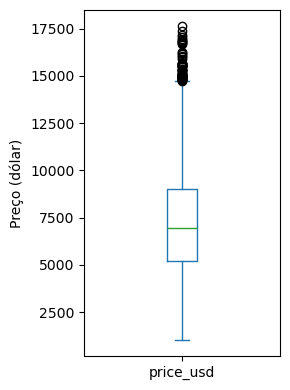

In [9]:
#se existem valores faltantes ou outliers.
#verificando se tem outliers do preço
ax=(df['price_usd']).plot.box(figsize=(3,4))
ax.set_ylabel('Preço (dólar)')
plt.tight_layout()
plt.show()


In [17]:
media_preco=df['price_usd'].mean()
media_preco=media_preco.round(2)
media_preco

7179.75

In [25]:
media_acidente=df['accidents_reported'].mean()
media_acidente=media_acidente.round(2)
media_acidente

0.49

In [29]:
qte_tipo=df.groupby('transmission')['transmission'].count()
qte_tipo
#ver quais possuem mais carros, automaticos ou manual

transmission
Automatic    4015
Manual       5985
Name: transmission, dtype: int64

In [30]:
qte_dono=df.groupby('owner_count')['owner_count'].count()
qte_dono

owner_count
1    2003
2    2002
3    1989
4    1969
5    2037
Name: owner_count, dtype: int64

2. Feature engineering: Com base na análise exploratória, o aluno deverá realizar transformações
nas variáveis do dataset, como normalização, codificação de variáveis categóricas, criação de
novas features, dentre outras técnicas.

In [38]:
def donos(owner_count):
    if owner_count <=3:
        return 'poucos donos'
    else:
        return 'muitos donos'
df['Pouco/muitos donos']=df['owner_count'].apply(donos)

In [39]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,Pouco/muitos donos
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No,muitos donos
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes,muitos donos
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,muitos donos
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,poucos donos
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,poucos donos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes,poucos donos
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes,poucos donos
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes,muitos donos
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes,muitos donos


In [49]:
def mediap(price_usd):
    if price_usd > media_preco:
        return 'acima da média de preço'
    else:
        return 'abaixo da média de preço'
df['Abaixo ou acima da média']=df['price_usd'].apply(mediap)

In [50]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,Pouco/muitos donos,Abaixo ou acima da média
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No,muitos donos,acima da média de preço
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes,muitos donos,abaixo da média de preço
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,muitos donos,acima da média de preço
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,poucos donos,abaixo da média de preço
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,poucos donos,abaixo da média de preço
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes,poucos donos,abaixo da média de preço
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes,poucos donos,acima da média de preço
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes,muitos donos,abaixo da média de preço
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes,muitos donos,acima da média de preço


In [47]:
df.groupby('accidents_reported')['accidents_reported'].count()


accidents_reported
0    6081
1    3058
2     731
3     120
4       8
5       2
Name: accidents_reported, dtype: int64

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: accidents_reported, Length: 10000, dtype: int64